In [107]:
# import  libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline               

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

california = fetch_california_housing(as_frame=True)

df = california.frame.copy()

print(df.shape)
df.head(10)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [108]:
# basic data info
print("Shape: ", df.shape)
print('\n')
print("Null value: ", df.isna().sum())
print('\n')
print(df.info())
print('\n')
df.describe().T

Shape:  (20640, 9)


Null value:  MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None




,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [109]:
# target and feature
target_col ='MedHouseVal'
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

X = df[feature_cols]
y = df[target_col]

print("Target:", target_col)
print("Feature columns:", feature_cols)
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape) 

Target: MedHouseVal
Feature columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
Shape of X:  (20640, 6)
Shape of y:  (20640,)


Correlation matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


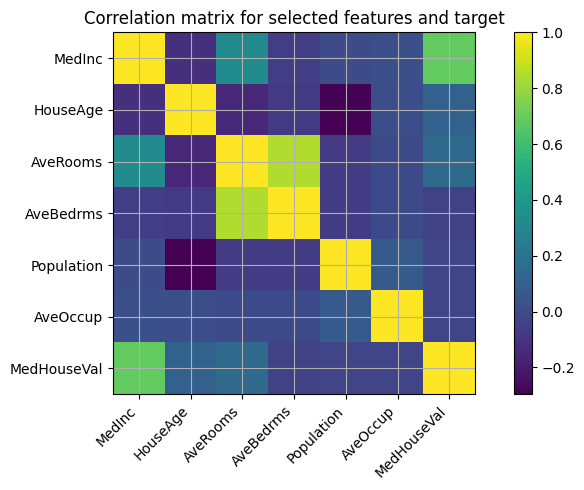

In [110]:
corr_matrix = df[feature_cols + [target_col]].corr()
print("Correlation matrix: ")
print(corr_matrix)


# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)   
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

In [111]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data: ", X_train.shape[0])
print("Test data: ", X_test.shape[0])

Training data:  16512
Test data:  4128


In [112]:
#  Linear Regression model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print('Intercept (bias term, b): ', lin_reg.intercept_)
print('\nCoefficients (weights, w): ')
for feature_name, coef in zip(feature_cols, lin_reg.coef_):
  print(f'{feature_name}: {coef}')

Intercept (bias term, b):  -0.552872764461434

Coefficients (weights, w): 
MedInc: 0.546160779107424
HouseAge: 0.01678790906256688
AveRooms: -0.22391994400479895
AveBedrms: 1.1154926114808374
Population: 2.3167197368174908e-05
AveOccup: -0.004618231345406696


In [113]:
# predictions on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print('predictions on test set (first 5 rows): ')
print('Predicted: ', y_test_pred[:5])
print('Actual: ', y_test.values[:5])

predictions on test set (first 5 rows): 
Predicted:  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual:  [0.477   0.458   5.00001 2.186   2.78   ]


In [114]:
# print evaluation metrics
def regression_metrics(y_true, y_pred, label='Model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'=== {label} ====')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2,'\n')

# Evaluate on train and test
regression_metrics(y_train, y_train_pred, label='Linear Regression (Train)')
regression_metrics(y_test, y_test_pred, label='Linear Regression (Test)')

=== Linear Regression (Train) ====
MAE:  0.5708698051066723
RMSE:  0.7791080690513484
R2 :  0.5459161602818385 

=== Linear Regression (Test) ====
MAE:  0.579214066545444
RMSE:  0.8013658536857475
R2 :  0.5099337366296416 



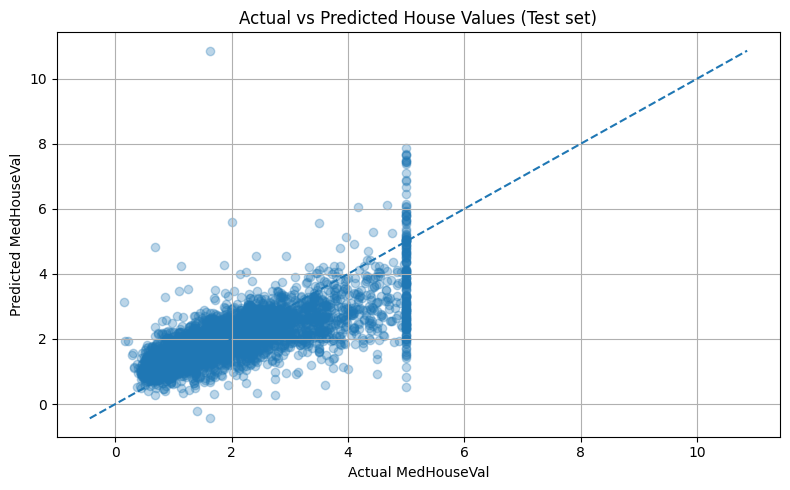

In [115]:
# predicted vs actual values on the test set

plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted House Values (Test set)')

# diagonal reference line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

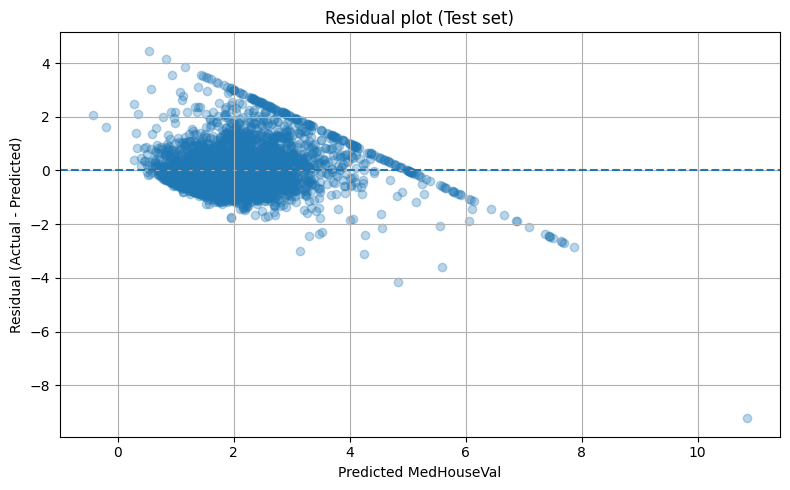

In [116]:
# residual plot (errors = actual - predicted)

residuals = y_test - y_test_pred

plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual plot (Test set)')
plt.tight_layout()
plt.show()

Not good result in linear regression, Because data is not linear. Lets see in a single feature

In [117]:
# single feature for illustration MedInc vs MedHouseVal

X_single = df[['MedInc']]
y_single = df[target_col]

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

In [118]:
# Fit a simple Linear Regression model using only MedInc
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single_train, y_single_train)
y_single_test_pred = lin_reg_single.predict(X_single_test)

regression_metrics(y_single_test, y_single_test_pred, label='Single Feature Linear Regression (Test)')

=== Single Feature Linear Regression (Test) ====
MAE:  0.629908653009376
RMSE:  0.8420901241414455
R2 :  0.45885918903846656 



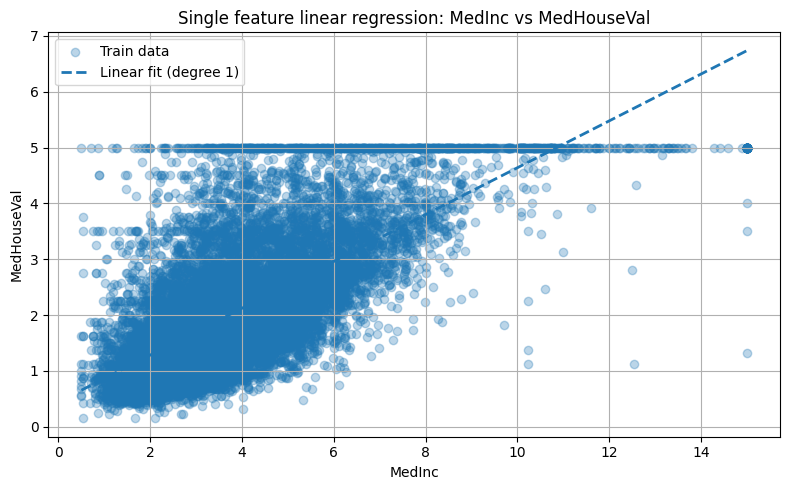

In [119]:
# data points
plt.scatter(X_single_train, y_single_train, alpha=0.3, label='Train data')

# regression line
X_plot = pd.DataFrame(
    np.linspace(
        X_single.min(),
        X_single.max(),
        200
    ),
    columns=['MedInc']
)

y_plot_lin = lin_reg_single.predict(X_plot)
plt.plot(X_plot, y_plot_lin, linewidth=2, linestyle='--', label='Linear fit (degree 1)')

# label and title
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Single feature linear regression: MedInc vs MedHouseVal')
plt.legend()
plt.tight_layout()
plt.show()


A single line can not predict the huge difference of data, so we try Polynomial Regression below

In [120]:
# compare polynomial regression of different degrees
degrees = [1,2,3,5,7,9,11,13]
results = []

for deg in degrees:
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])

  model.fit(X_single_train, y_single_train)

  y_train_pred_deg = model.predict(X_single_train)
  y_test_pred_deg = model.predict(X_single_test)

  mae_train = mean_absolute_error(y_single_train, y_train_pred_deg)
  rmse_train = np.sqrt(mean_squared_error(y_single_train, y_train_pred_deg))
  r2_train = r2_score(y_single_train, y_train_pred_deg)

  mae_test = mean_absolute_error(y_single_test, y_test_pred_deg)
  rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred_deg))
  r2_test = r2_score(y_single_test, y_test_pred_deg)

  results.append({
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
  })

results_df = pd.DataFrame(results)
results_df

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,0.624951,0.836149,0.476993,0.629909,0.842090,0.458859
1,2,0.624049,0.832459,0.481598,0.628292,0.838614,0.463318
2,3,0.615010,0.825033,0.490806,0.621896,0.835641,0.467116
3,5,0.614411,0.824844,0.491039,0.621369,0.835892,0.466796
4,7,0.612486,0.822268,0.494214,0.618768,0.832553,0.471047
5,9,0.612699,0.822412,0.494036,0.618892,0.832728,0.470825
6,11,0.615610,0.824746,0.491160,0.622252,0.835472,0.467332
7,13,0.627794,0.836790,0.476190,0.636961,0.850450,0.448062


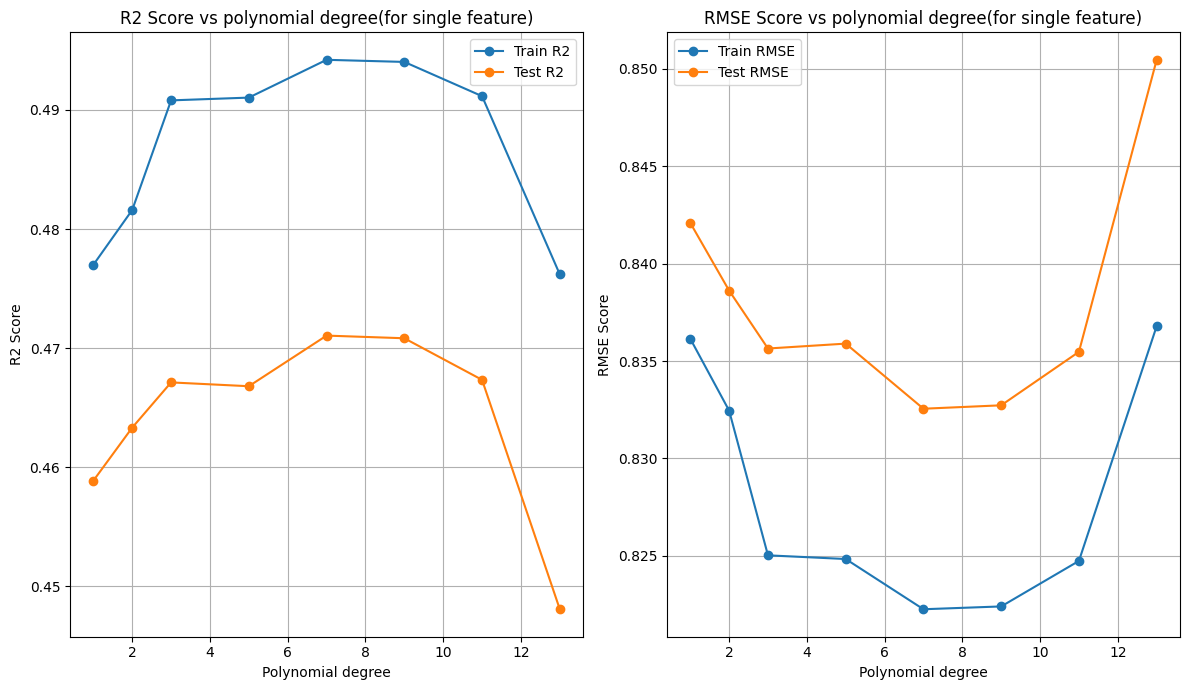

In [121]:
fig, axes = plt.subplots(1,2, figsize=(12,7))

# R squared
axes[0].plot(results_df['degree'], results_df['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df['degree'], results_df['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree(for single feature)")
axes[0].legend()

# RMSE
axes[1].plot(results_df['degree'], results_df['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree(for single feature)")
axes[1].legend()

plt.tight_layout()
plt.show()


In [122]:
# with all features
X_all = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

degrees = [1,2,3,4]
results_all = []

for deg in degrees:
  model_all = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])

  model_all.fit(X_all_train, y_all_train)
  y_all_train_pred = model_all.predict(X_all_train)
  y_all_test_pred = model_all.predict(X_all_test)

  mae_train = mean_absolute_error(y_all_train, y_all_train_pred)
  rmse_train = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
  r2_train = r2_score(y_all_train, y_all_train_pred)

  mae_test = mean_absolute_error(y_all_test, y_all_test_pred)
  rmse_test = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
  r2_test = r2_score(y_all_test, y_all_test_pred)

  results_all.append({
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
  })

results_df_all = pd.DataFrame(results_all)
results_df_all

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,0.528628,0.719676,0.612551,0.533200,0.745581,0.575788
1,2,0.460838,0.648634,0.685268,0.467001,0.681397,0.645682
2,3,0.426536,0.597626,0.732823,0.478554,2.145071,-2.511370
3,4,0.454072,0.627035,0.705880,0.628890,10.249208,-79.162969


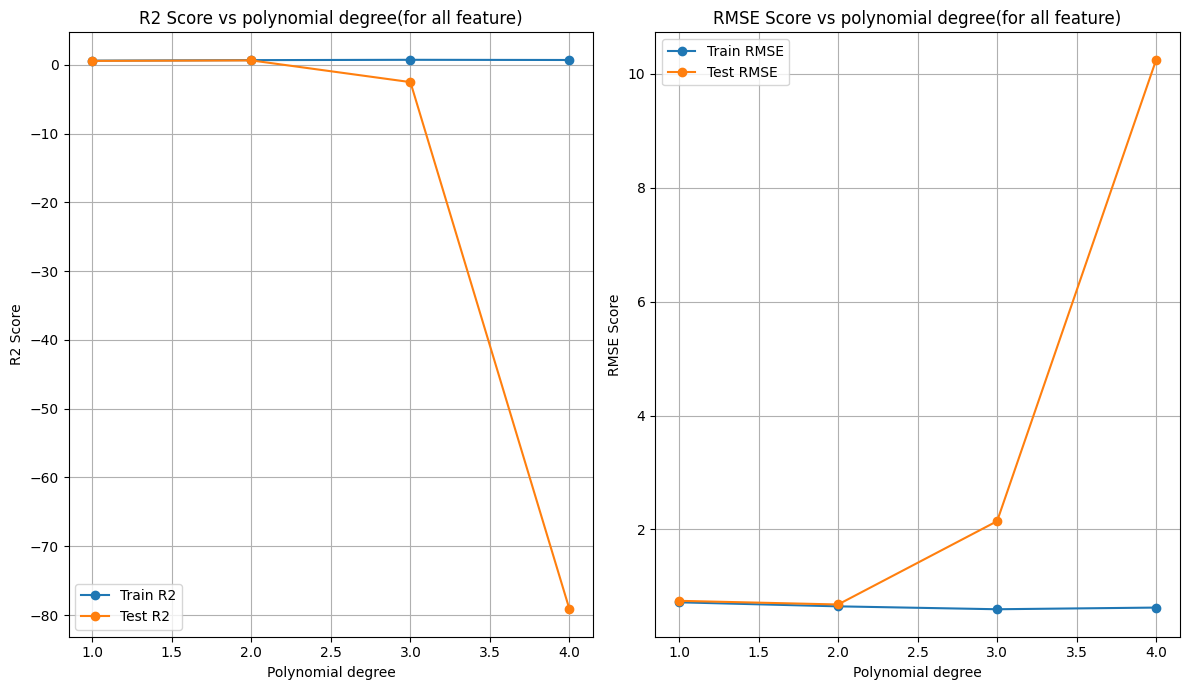

In [123]:
fig, axes = plt.subplots(1,2, figsize=(12,7))

# R squared
axes[0].plot(results_df_all['degree'], results_df_all['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df_all['degree'], results_df_all['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree(for all feature)")
axes[0].legend()

# RMSE
axes[1].plot(results_df_all['degree'], results_df_all['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df_all['degree'], results_df_all['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree(for all feature)")
axes[1].legend()

plt.tight_layout()
plt.show()
